Hi everyone.
My name is Yohanes Kurniawan Hertanto and I'm just starting my study on data science and AI.
I'm still a beginner in data analysis, data processing and AI engineering world, but I'm also a millenial noob in IT world.

Right now, I'm practising on using Python in experiementing with data analysis and creating a machine learning model of certain weather dataset from Australia.
The Australian weather dataset that I used is available on Kaggle and the data itself contained weather anomaly from November 1st, 2007 until June 25th, 2017.
The data was taken from various cities and location in Australia during that period.
The mission is to try creating a machine learning model using Logistic Regression in order to predict the chance of rainfall for the next day.

Since I have no experience in using Python or doing any data processing, I was given clues and directions by a friend of mine on how to analyze and process this dataset.
You can see my work below on the Australian weather dataset and I'm planning to analyze more datasets in order to familiarize myself with Python, data science and AI engineering.

Feel free to enlighten me and highlight my mistakes so that I can refine my work for this dataset.

In [ ]:
import numpy as np # for processing numerical data variables in the shape of arrays
import pandas as pd # for analyzing data variables in the shape of tables
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [ ]:
# Uploading the dataset into the notebook
df_weather = pd.read_csv('https://raw.githubusercontent.com/yohaneskh/Rain-Prediction-in-Australia_Finished/refs/heads/main/weatherAUS.csv')

# Displaying the dataset head for early identification
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Displaying the variables (columns) names of the dataset
col_names = df_weather.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Displaying the summary and dimensions of the dataset
df_weather.info()
df_weather.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(145460, 23)

From the summary above, I can see that there are 145,460 entries/rows with 23 variables (columns).

Below is the description of each variable of the dataset,

### 1. General Information

- **Date** → The date of weather recording  
- **Location** → The location where the weather data is gathered  

### 2. Temperature & Rainfall

- **MinTemp** → Minimum daily temperature (°C)  
- **MaxTemp** → Maximum daily temperature (°C)  
- **Rainfall** → Total rainfall in mm  

### 3. Other Weather Variables

- **Evaporation** → Amount of evaporated water in mm (contains many missing values)  
- **Sunshine** → Sunlight duration in hours (contains many missing values)  

### 4. Wind Information

- **WindGustDir** → Wind direction (e.g., W = West)  
- **WindGustSpeed** → Wind speed in km/h  
- **WindDir9am** → Wind direction at 9am  
- **WindDir3pm** → Wind direction at 3pm  
- **WindSpeed9am** → Wind speed at 9am  
- **WindSpeed3pm** → Wind speed at 3pm  

### 5. Humidity & Air Pressure

- **Humidity9am** → Humidity percentage at 9am  
- **Humidity3pm** → Humidity percentage at 3pm  
- **Pressure9am** → Air pressure (hPa) at 9am  
- **Pressure3pm** → Air pressure (hPa) at 3pm  

### 6. Clouds & Other Temperature Conditions

- **Cloud9am** → Cloud coverage percentage at 9am (contains many missing values)  
- **Cloud3pm** → Cloud coverage percentage at 3pm  
- **Temp9am** → Temperature (°C) at 9am  
- **Temp3pm** → Temperature (°C) at 3pm  

### 7. Target Prediction

- **RainToday** → Will it rain today? (Yes/No)  
- **RainTomorrow** → Target prediction, will it rain tomorrow? (Yes/No)  


Right now, I'm going to divide the dataset into Categorical and Numerical variables.

Categorical variables have object as their data type, while Numerical ones have float as their data type.

I segregate them so that later it will be easier for me to transform the data type and decide which kind of decoding is suitable for each variable.

In [ ]:
# Now I separate and find Categorical variables

categorical = [var for var in df_weather.columns if df_weather[var].dtype=="O"]
print("There are {} categorical variables.\n".format(len(categorical)))
print("The categorical variables are as follows:\n", categorical)

There are 7 categorical variables.

The categorical variables are as follows:
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# I can display and view the head of Categorical variables
df_weather[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


1. To summarize, I can see that there are 7 Categorical variables which are,
- Date,
- Location,
- WindGustDir,
- WindDir9am,
- WindDir3pm,
- RainToday,
- RainTomorrow.

2. Later on, I will check Date variable further by changing the data type into datetime format and extract year, month and date into separate variables.

3. There are 2 binary Categorical variables which are RainToday & RainTomorrow.

4. RainTomorrow is the target variable.


In [ ]:
# Check any missing values inside each Categorical variables
df_weather[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
# Print any Categorical variables with missing values
cat1 = [var for var in categorical if df_weather[var].isnull().sum()!=0]
print(df_weather[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


From the information above, those Categorical variables have lots of missing values!
- WindGustDir     10326
- WindDir9am      10566
- WindDir3pm       4228
- RainToday        3261
- RainTomorrow     3267

Next, I'm going to check the frequency of values in each Categorical variable.

In [ ]:
# View the frequency of values inside each Categorical variables
for var in categorical:
    print(df_weather[var].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

Now I can check the frequency distribution (%) of values in each Categorical variable.

In [ ]:
# View the frequency distribution of values inside each Categorical variables
for var in categorical:
    print(df_weather[var].value_counts()/float(len(df_weather)))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

I also want to check the cardinality or number of labels in each Categorical variable to check which one has high cardinality and later I can decide which kind of decoding will be used for each variable.

In [ ]:
# Check for cardinality in Categorical variables
for var in categorical:
    print(var, "contains", len(df_weather[var].unique()), "labels")

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


The Date variable has high cardinality and I decided to do some preprocessing.

The other Categorical variables have smaller numer of labels compared to Date.

In [ ]:
# Check the Date datatype before making any changes
df_weather["Date"].dtypes

dtype('O')

I can see that the data type of Date is object, I should change it into datetime format.
After that, I can extract Day, Month and Year from Date into new variables for future needs.

In [ ]:
# The dates will be parsed from object into datetime format
df_weather["Date"] = pd.to_datetime(df_weather["Date"])

# Extracting Day, Month and Year from the dates
df_weather["Year"] = df_weather["Date"].dt.year
df_weather["Month"] = df_weather["Date"].dt.month
df_weather["Day"] = df_weather["Date"].dt.day

After extracting and creating new variables from Date, I'm going to check the newly updated summary of the dataset before making any further changes or transformations.

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
# Dropping the original Date variable from the dataset
df_weather.drop("Date", axis=1, inplace = True)

In [ ]:
# Preview the current dataset again after dropping the Date variable
df_weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# I separate and find Categorical variables in the newly updated dataset (without Date)

categorical = [var for var in df_weather.columns if df_weather[var].dtype=="O"]
print("There are {} categorical variables.\n".format(len(categorical)))
print("The categorical variables are as follows:\n", categorical)

There are 6 categorical variables.

The categorical variables are as follows:
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Print any Categorical variables with missing values
df_weather[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

I can see that these following Categorical variables contain missing values,
- Location,
- WindGustDir,
- WindDir9am,
- WindDir3pm,
- RainToday.

I shall explore those Categorical variables one by one.

Since RainTomorrow is our target variable, I'm going to leave it be.

**Firstly**, I'm going to explore Location variable.

In [ ]:
# Print and display the number of labels in Location variable
print("Location contains", len(df_weather.Location.unique()), "labels")

Location contains 49 labels


In [ ]:
# Display the number of labels of Location variable
df_weather.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# Display the frequency distribution of values in Location variable
df_weather.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

Right now I will do the following steps for Location variable,
1. Let's do One Hot Encoding of Location variable,
2. Get K1 dummy variables after that,
3. Preview the head of the dataset.

In [ ]:
pd.get_dummies(df_weather.Location, drop_first=True).astype(int).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Secondly**, I'm going to explore WindGustDir variable.

In [ ]:
# Print and display the number of labels in WindGustDir variable
print("WindGustDir contains", len(df_weather.WindGustDir.unique()), "labels")

WindGustDir contains 17 labels


In [ ]:
# Display the number of labels of WindGustDir variable
df_weather.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
# Display the frequency distribution of values in WindGustDir variable
df_weather.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

Right now I will do the following steps for WindGustDir variable,
1. Let's do One Hot Encoding of WindGustDir variable,
2. Get K1 dummy variables after that,
3. Add an additional dummy variable to indicate any missing values,
4. Preview the head of the dataset.

In [ ]:
pd.get_dummies(df_weather.WindGustDir, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now, I can sum the number of 1s per boolean in WindGustDir variable over the rows in the dataset.

In [ ]:
pd.get_dummies(df_weather.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

There are 10,326 missing values in WindGustDir variable.

**Thirdly**, I'm going to explore WindDir9am variable.

In [ ]:
# Print and display the number of labels in WindDir9am variable
print("WindDir9am contains", len(df_weather.WindDir9am.unique()), "labels")

WindDir9am contains 17 labels


In [ ]:
# Display the number of labels of WindDir9am variable
df_weather.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
# Display the frequency distribution of values in WindDir9am variable
df_weather.WindDir9am.value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

Right now I will do the following steps for WindDir9am variable,
1. Let's do One Hot Encoding of WindDir9am variable,
2. Get K1 dummy variables after that,
3. Add an additional dummy variable to indicate any missing values,
4. Preview the head of the dataset.

In [ ]:
pd.get_dummies(df_weather.WindDir9am, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, we can sum the number of 1s per boolean in WindDir9am variable over the rows in the dataset.

In [ ]:
pd.get_dummies(df_weather.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

There are 10,566 missing values in WindDir9am variable.

**Fourthly**, I'm going to explore WindDir3pm variable.

In [ ]:
# Print and display the number of labels in WindDir3pm variable
print("WindDir3pm contains", len(df_weather.WindDir3pm.unique()), "labels")

WindDir3pm contains 17 labels


In [ ]:
# Display the number of labels of WindDir3pm variable
df_weather.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [ ]:
# Display the frequency distribution of values in WindDir3pm variable
df_weather.WindDir3pm.value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

Right now I will do the following steps for WindDir3pm variable,
1. Let's do One Hot Encoding of WindDir3pm variable,
2. Get K1 dummy variables after that,
3. Add an additional dummy variable to indicate any missing values,
4. Preview the head of the dataset.

In [ ]:
pd.get_dummies(df_weather.WindDir3pm, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Now, I can sum the number of 1s per boolean in WindDir3pm variable over the rows in the dataset.

In [ ]:
pd.get_dummies(df_weather.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

There are 4,228 missing values in WindDir3pm variable.

**Fifthly**, I'm going to explore RainToday variable.

In [ ]:
# Print and display the number of labels in RainToday variable
print("RainToday contains", len(df_weather.RainToday.unique()), "labels")

RainToday contains 3 labels


In [ ]:
# Display the number of labels of RainToday variable
df_weather.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# Display the frequency distribution of values in RainToday variable
df_weather.RainToday.value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

Right now I will do the following steps for RainToday variable,
1. Let's do One Hot Encoding of RainToday variable,
2. Get K1 dummy variables after that,
3. Add an additional dummy variable to indicate any missing values,
4. Preview the head of the dataset.

In [ ]:
pd.get_dummies(df_weather.RainToday, drop_first=True, dummy_na=True).astype(int).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Now, I can sum the number of 1s per boolean in RainToday variable over the rows in the dataset.

In [ ]:
pd.get_dummies(df_weather.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 3,261 missing values in RainToday variable.

After exploring Categorical variables of the dataset, now it's time to explore Numerical variables one by one.

In [ ]:
# Now I'm going to separate and find Numerical variables

numerical = [var for var in df_weather.columns if df_weather[var].dtype!="O"]
print("There are {} numerical variables.\n".format(len(numerical)))
print("The numerical variables are as follows:\n", numerical)

There are 19 numerical variables.

The numerical variables are as follows:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
# Now I'm going to display and view the head of Numerical variables
df_weather[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


1. To summarize, there are 19 Numerical variables which are as following,
- MinTemp,
- MaxTemp,
- Rainfall,
- Evaporation,
- Sunshine
- WindGustSpeed,
- WindSpeed9am,
- WindSpeed3pm,
- Humidity9am,
- Humidity3pm,
- Pressure9am,
- Pressure3pm,
- Cloud9am,
- Cloud3pm,
- Temp9am,
- Temp3pm,
- Year,
- Month,
- Day.

2. Now it's the time to explore Numerical variables to check for any problems, such as missing values and outliers.

In [ ]:
# Check for any missing values in Numerical variables

df_weather[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

From the information above, there are 16 Numerical variables with missing values.

Now, I should check for any outliers in each Numerical variable.

In [ ]:
# Display the statistical summary of Numerical variables
print(round(df_weather[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

I believe some Numerical variables might have outliers, such as following,
1. Rainfall,
2. Evaporation,
3. WindSpeed9am,
4. WindSpeed3pm.

Let's create some boxplots to visualize the outliers.

Text(0, 0.5, 'WindSpeed3pm')

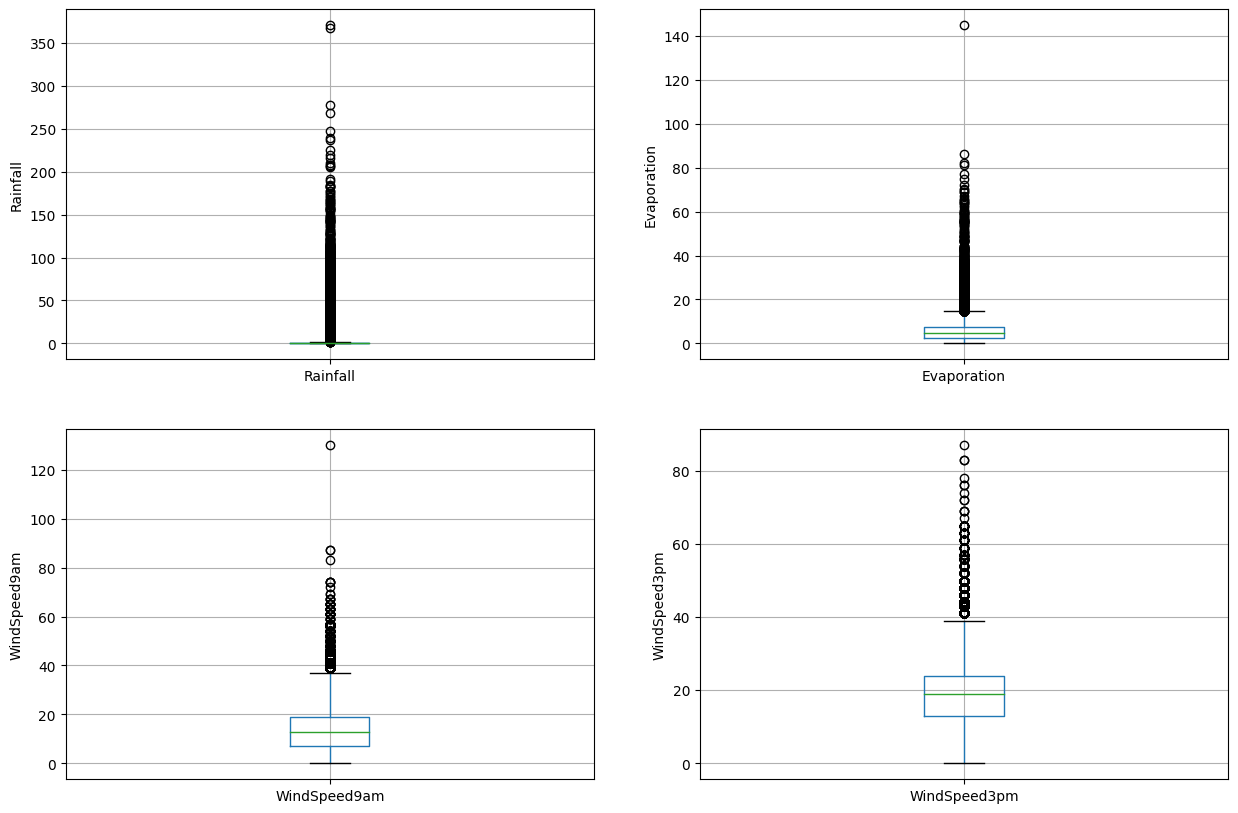

In [ ]:
# Creating boxplots to visualize outliers of aforementioned variables

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_weather.boxplot(column="Rainfall")
fig.set_title("")
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df_weather.boxplot(column="Evaporation")
fig.set_title("")
fig.set_ylabel("Evaporation")

plt.subplot(2, 2, 3)
fig = df_weather.boxplot(column="WindSpeed9am")
fig.set_title("")
fig.set_ylabel("WindSpeed9am")

plt.subplot(2, 2, 4)
fig = df_weather.boxplot(column="WindSpeed3pm")
fig.set_title("")
fig.set_ylabel("WindSpeed3pm")

The boxplots above confirm that there are outliers in those Numerical variables.

The next step is that I'm going to check the distribution of values inside those variables before I do any changes, in other words, I'm going to check if they are normally distributed or skewed.

In order to do that, I'm going to create plot histograms.

Text(0, 0.5, 'RainTomorrow')

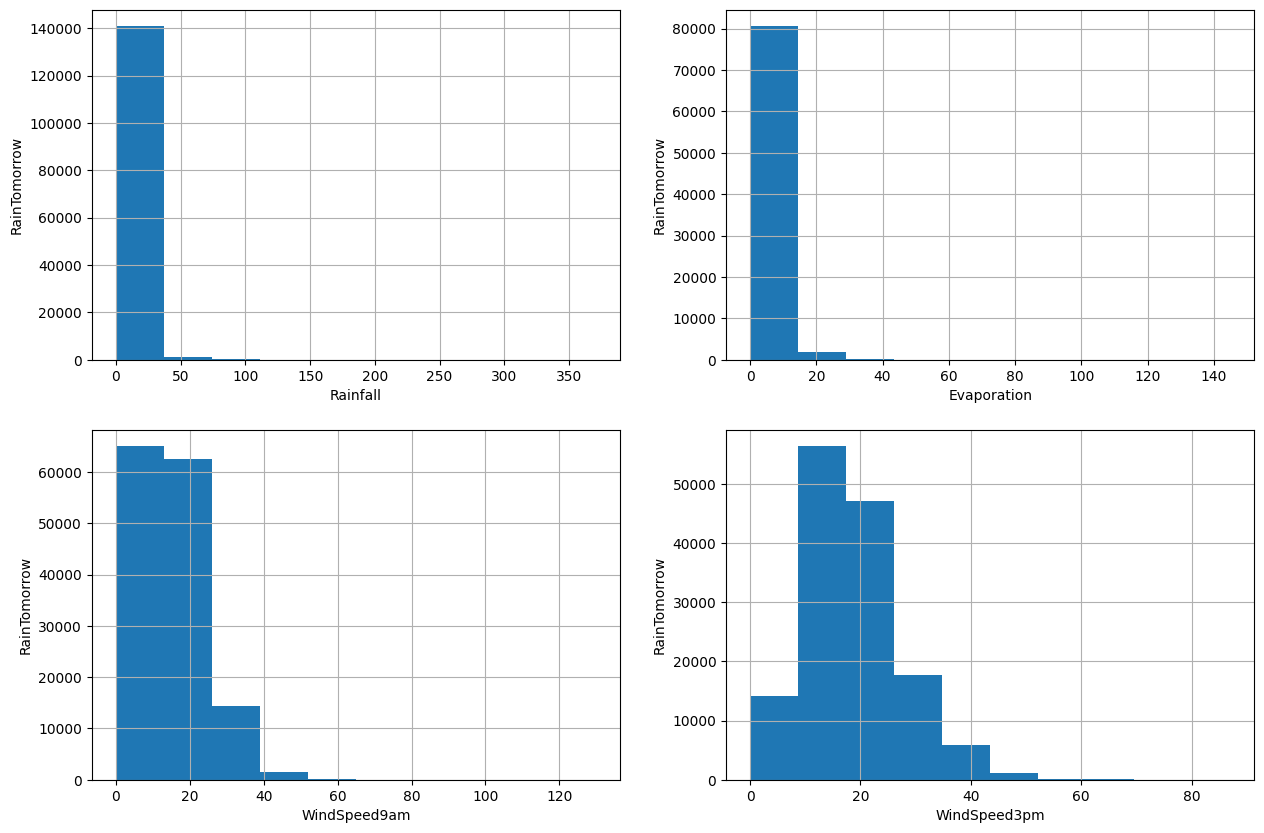

In [ ]:
# Creating plot histograms to check the value distribution of those variables

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_weather.Rainfall.hist(bins=10)
fig.set_xlabel("Rainfall")
fig.set_ylabel("RainTomorrow")

plt.subplot(2, 2, 2)
fig = df_weather.Evaporation.hist(bins=10)
fig.set_xlabel("Evaporation")
fig.set_ylabel("RainTomorrow")

plt.subplot(2, 2, 3)
fig = df_weather.WindSpeed9am.hist(bins=10)
fig.set_xlabel("WindSpeed9am")
fig.set_ylabel("RainTomorrow")

plt.subplot(2, 2, 4)
fig = df_weather.WindSpeed3pm.hist(bins=10)
fig.set_xlabel("WindSpeed3pm")
fig.set_ylabel("RainTomorrow")

It is clear that those four variables have skewed value distribution, therefore I'm going to use interquantile range to determine the outliers.

In [ ]:
# I want to display the statistical summary of Numerical variables again
print(round(df_weather[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

In [ ]:
# Determining outliers for Rainfall variable

IQR = df_weather.Rainfall.quantile(0.75) - df_weather.Rainfall.quantile(0.25)
Lower_fence = df_weather.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df_weather.Rainfall.quantile(0.75) + (IQR * 3)
print("The outliers for Rainfall variable are values < {lowerboundary} or > {upperboundary}".format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

The outliers for Rainfall variable are values < -2.4000000000000004 or > 3.2


From the calculation above, combined with the minimum and maximum values for Rainfall variable which are 0 and 371, the outliers for Rainfall variable are values > 3.2.

In [ ]:
# Determining outliers for Evaporation variable

IQR = df_weather.Evaporation.quantile(0.75) - df_weather.Evaporation.quantile(0.25)
Lower_fence = df_weather.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df_weather.Evaporation.quantile(0.75) + (IQR * 3)
print("The outliers for Evaporation variable are values < {lowerboundary} or > {upperboundary}".format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

The outliers for Evaporation variable are values < -11.800000000000002 or > 21.800000000000004


From the calculation above, combined with the minimum and maximum values for Evaporation variable which are 0 and 145, the outliers for Evaporation variable are values > 21.8.

In [ ]:
# Determining outliers for WindSpeed9am variable

IQR = df_weather.WindSpeed9am.quantile(0.75) - df_weather.WindSpeed9am.quantile(0.25)
Lower_fence = df_weather.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df_weather.WindSpeed9am.quantile(0.75) + (IQR * 3)
print("The outliers for WindSpeed9am variable are values < {lowerboundary} or > {upperboundary}".format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

The outliers for WindSpeed9am variable are values < -29.0 or > 55.0


From the calculation above, combined with the minimum and maximum values for WindSpeed9am variable which are 0 and 130, the outliers for WindSpeed9am variable are values > 55.

In [ ]:
# Determining outliers for WindSpeed3pm variable

IQR = df_weather.WindSpeed3pm.quantile(0.75) - df_weather.WindSpeed9am.quantile(0.25)
Lower_fence = df_weather.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df_weather.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print("The outliers for WindSpeed3pm variable are values < {lowerboundary} or > {upperboundary}".format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

The outliers for WindSpeed3pm variable are values < -38.0 or > 75.0


From the calculation above, combined with the minimum and maximum values for WindSpeed3pm variable which are 0 and 87, the outliers for WindSpeed3pm variable are values > 75.

After I find the outliers for these Numerical variables as following,
- Rainfall,
- Evaporation,
- WindSpeed9am,
- WindSpeed3pm.

I decide to declare the target variable, which is RainTomorrow, and split data into test and training set.

In [ ]:
# Declare the target variable
X = df_weather.drop(["RainTomorrow"], axis=1)
y = df_weather["RainTomorrow"]

In [ ]:
# Separating the data into test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Checking the shape of X_train and X_test
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

After declaring the target variable and splitting the data into train and test set, I'm going to do some Feature Engineering.

Feature Engineering is the process of transforming raw data into useful features that can assist me to gain better understanding of the model and increase its prediction ability (reducing error rate).

Now, I'm going to display both Categorical and NUmerical variables again separately.

In [ ]:
# Checking data types in X_train
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [ ]:
# Display Categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == "O"]
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# Display Numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != "O"]
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

Now let's find and count how many missing values are there in each x_train of each Numerical variable.

In [ ]:
# Count the total missing values in Numerical variables of X_train set
X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
# Count the total missing values in Numerical variables of X_test set
X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
# Count and display the percetage of missing values in the Numerical variables in training set
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


In [ ]:
# Count and display the percetage of missing values in the Numerical variables in testing set
for col in numerical:
    if X_test[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


There are two methods which can be used to impute/input/fill in the missing values.
1. Mean or median imputation,
2. Random sample imputation.

For datasets with outliers, it is best to use median imputation because it perform better against outliers.

To avoid overfitting, the median imputation will be done over the training set and the results will be fitted/propagated info the testing set as well. It means that the median values will be extracted only from the train set, but those values will be used for both train and test sets.

In [ ]:
# Inserting missing values in Numerical variables of X_train and X_test datasets by inserting with median values from respective variables (columns) in X_train dataset
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
# Check for any existing missing values in Numerical variables of X_train dataset
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# Check for any existing missing values in Numerical variables of X_test dataset
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now, there are no missing values in both Numerical variables (columns) of both X_train and X_test datasets.

In [ ]:
# Count the total missing values in Categorical variables of X_train set
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [ ]:
# Count the total missing values in Categorical variables of X_test set
X_test[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.070672
WindDir9am     0.072804
WindDir3pm     0.029527
RainToday      0.022137
dtype: float64

Since those are Categorical variables without outliers, I'm going to impute missing values with the most frequent value (mode) from respective variables (columns).

In [ ]:
# Inserting missing values in Categorical variables of X_train and X_test datasets by inserting with mode values from respective variables (columns) in X_train dataset
for df2 in [X_train, X_test]:
    df2["WindGustDir"].fillna(X_train["WindGustDir"].mode()[0], inplace=True)
    df2["WindDir9am"].fillna(X_train["WindDir9am"].mode()[0], inplace=True)
    df2["WindDir3pm"].fillna(X_train["WindDir3pm"].mode()[0], inplace=True)
    df2["RainToday"].fillna(X_train["RainToday"].mode()[0], inplace=True)

In [ ]:
# Check missing values in Categorical variables in X_train set
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# Check missing values in Categorical variables in X_test set
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

Before proceeding to the next step, I want to check if there's any missing values in each variable (column) of both Categorical and Numerical variables inside X_train and X_test datasets.

In [ ]:
# Check any missing values in X_train
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# Check any missing values in X_test
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

I can conclude now there are no missing values in Categorical and Numerical variables of X_train and X_test datasets.

The next step is that I'm going to cap maximum values in each Numerical variables in order to eliminate outliers.

As a reminder, those Numerical variables are as following,
1. Rainfall,
2. Evaporation,
3. WindSpeed9am,
4. WindSpeed3pm.

In [ ]:
# Capping the maximum values of each Numerical variable using values found with interquantile method (upper fence/upper boundary values)

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3["Rainfall"] = max_value(df3, "Rainfall", 3.2)
    df3["Evaporation"] = max_value(df3, "Evaporation", 21.8)
    df3["WindSpeed9am"] = max_value(df3, "WindSpeed9am", 55)
    df3["WindSpeed3pm"] = max_value(df3, "WindSpeed3pm", 57)

In [ ]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [ ]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [ ]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [ ]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


From the X_train set description of Numerical variables above, I can see that the maximum values of Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm variable are capped.

After determining and setting the maximum values of Numerical variables with outliers in the X_train set, now I will try to encode Categorical variables of X_train set.

In [ ]:
# Remind me which ones are Categorical variables
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [ ]:
# NOTE: Uncomment this line if 'category_encoders' is not yet installed in your environment
!pip install category_encoders

# The line above installs the 'category_encoders' library
# It helps convert categorical data into numeric format, making it usable by ML models.

In [ ]:
# Encoding the values in RainToday variable into numerical values
# No == 0 while Yes == 1

import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["RainToday"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


I can see that there are two additional variables which are RainToday_0 dan RainToday_1 because of the previous Binary Encoding process.

There are another simpler methods to do encoding which are,
1. Using map() --> simplest way
   
* X_train["RainToday"] = X_train["RainToday"].map({"No": 0, "Yes": 1})

* X_test["RainToday"] = X_test["RainToday"].map({"No": 0, "Yes": 1})

2. Using LabelEncoder from sklearn
encoder = LabelEncoder()

* X_train["RainToday"] = encoder.fit_transform(X_train["RainToday"])

* X_test["RainToday"] = encoder.transform(X_test["RainToday"])

By using those two mentioned menthods, the RainToday variable (column) won't be transformed into 2 separate variables.

Fof the next step, I'm going to create X_train training set that includes,
1. Numerical variables,
2. Categorical variables,
3. Target variable (RainToday).

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[["RainToday_0", "RainToday_1"]],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,False,False,False,False,False,False,False,False,False,False
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,False,False,False,False,False,False,False,False,False,False
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,False,False,False,False,False,False,True,False,False,False
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,False,False,False,False,False,False,False,False,False,False
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,False,False,False,False,False,False,False,False,False,False


Similarly, I'm going to create X_test testing set with the same variables.

In [ ]:
X_test = pd.concat([X_test[numerical], X_test[["RainToday_0", "RainToday_1"]],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,False,False,False,False,False,False,False,False,False,False
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,False,False,False,False,False,False,False,False,False,False
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,False,False,False,False,False,False,False,True,False,False
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,False,False,False,False,False,False,True,False,False,False
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,False,False,False,False,False,False,False,False,False,False


Right now I already have both training and testing sets ready for model building.

Before we build the model, I will map all the feature variables onto the same scale, it is called Feature Scaling.

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,...,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954,0.219648,0.780352
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,...,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931,0.414010,0.414010
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000,0.000000,1.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.752475,0.835539,0.5000,0.513761,0.793103,0.395349,0.363636,0.578947,0.50,0.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.717822,0.799622,0.0000,0.422018,0.579310,0.410853,0.309091,0.350877,0.47,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.336634,0.415879,0.0625,0.215596,0.579310,0.341085,0.509091,0.385965,0.68,0.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.504950,0.408318,0.3125,0.215596,0.579310,0.170543,0.200000,0.228070,0.80,0.79,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.396040,0.493384,0.0000,0.215596,0.579310,0.069767,0.036364,0.122807,0.88,0.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since I have both X_train and X_test sets ready to be used to create machine learning model, I'm going to try using Logistic Regression classifier for this model.

**MACHINE LEARNING MODEL TRAINING & DEVELOPING PHASE**

In [ ]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

In [ ]:
# Let's train a logistic regression machine learning model on the training set
from sklearn.linear_model import LogisticRegression

# Instantiate/create/develop the machine learning model
logreg = LogisticRegression(solver="liblinear", random_state=0)

# Fit the machine learning model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

**PREDICTING RESULTS OF THE MODEL**

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

Now I'm going to use **predict_proba** method which will give probabilities for the target variable (RainTomorrow) between 0 and 1.

**0** is for **no probability** of rain while **1** is for **probability of rain**.

In [ ]:
# Probability of getting output as 0 --> No Rain
logreg.predict_proba(X_test)[:,0]

array([0.83216813, 0.7455017 , 0.79860399, ..., 0.42026165, 0.6575357 ,
       0.96955019])

In [ ]:
# Probability of getting output as 1 --> Rain
logreg.predict_proba(X_test)[:,1]

array([0.16783187, 0.2544983 , 0.20139601, ..., 0.57973835, 0.3424643 ,
       0.03044981])

Now I'm going to check the accuracy score of the model.

In [ ]:
from sklearn.metrics import accuracy_score
print("Model Accuracy Score: {0:0.4f}". format(accuracy_score(y_test, y_pred_test)))

Model Accuracy Score: 0.8484


I have calculated the model accuracy store which is 0.8484.

Now, let's check whether the **train set** and **test set** are overfitting/underfitting by comparing their accuracy.

In [ ]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Displaying the Training Set accuracy
print("Training Set Accuracy Score: {0:0.4f}". format(accuracy_score(y_train, y_pred_train)))

Training Set Accuracy Score: 0.8488


In [ ]:
# Displaying the Testing Set accuracy
print("Testing Set Accuracy Score: {:.4f}".format(logreg.score(X_test, y_test)))

Testing Set Accuracy Score: 0.8484


Since the accuracy score of both sets are quite comparable, I can conclude that there is no case of overfitting and underfitting.
* Training Set Accuracy Score: 0.8488
* Testing Set Accuracy Score: 0.8484

Next, I want to compare my Logistic Regression model accuracy with Null Accuracy.

I'm doing this to make sure that the accuracy score of my ML model based on Logistic Regression is good enough to make weather prediction.

Null Accuracy is the accuracy that could be achieved by always predicting the most frequent class.

**Comparing Logistic Regression ML model accuracy with Null Accuracy.**

In [ ]:
# Check class distribution in the Test set
y_test.value_counts()

RainTomorrow
No     22726
Yes     6366
Name: count, dtype: int64

From the class distribution above, the most frequent class is 22,726 NOs. Now I'm going to calculate the Null Accuracy Score by dividing 22,726 by the total number of occurences.

In [ ]:
# Calculating the Null Accuracy Score
null_accuracy = (22726/(22067+6366))
print("The Null Accuracy Score is {0:0.4f}". format(null_accuracy))

The Null Accuracy Score is 0.7993


Based on the calculations above, I can conclude that my Logistic Regression machine learning model works well in predicting class labels (weather condition).

The Model Accuracy Score is 0.8484 which is high than the Null Accuracy Score (0.7993).

But the model is not perfect or 100% accurate, therefore I'm going to use Confusion Matrix as a tool to identify any types of errors that might happen.

Confusion Matrix is a table too check how well is the model in making predictions, the table will compare any predictions made with reality. It can help me to fix any errors and find ways to increase the model's accuracy.

There are four types of possible outcomes in evaluating model performance,
1. True Positive (TP) --> predicting rain and it really rains,
2. True Negative (TN) --> predicting rain and it doesn't rain,
3. False Positive (FP) --> predicting rain but it doesn't rain (false alarm),
4. False Negative (FN) --> predicting dry but it d rains (failure).

In [ ]:
# Print the Confusion Matrix and divide it into four parts

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print("Confusion matrix\n\n", cm)
print("\nTrue Positives(TP) = ", cm[0,0])
print("\nTrue Negatives(TN) = ", cm[1,1])
print("\nFalse Positives(FP) = ", cm[0,1])
print("\nFalse Negatives(FN) = ", cm[1,0])

Confusion matrix

 [[21543  1183]
 [ 3227  3139]]

True Positives(TP) =  21543

True Negatives(TN) =  3139

False Positives(FP) =  1183

False Negatives(FN) =  3227


Based on the Confusion Matrix above, there are 21,543 + 3,139 = 24,862 correct predictions and 1,183 + 3,227 = 4,410 wrong predictions.
* True Positives (actual positive 1 and predict positive 1) = 21,543
* True Negatives (actual negative 0 and predict negative 0) = 3,139
* False Positives (actual negative 0 and predict positive 1) = 1,183 (type I error)
* False Negatives (actual positive 1 and predict negative 0) = 3,227 (type II error)

To make the results easier to understand, I'm going to make a visualization with seaborn heatmap.

<Axes: >

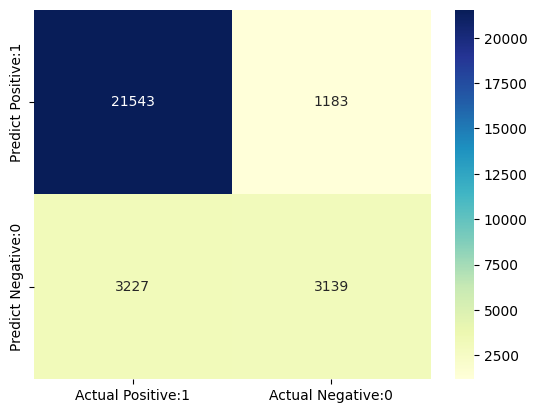

In [ ]:
# Confusion Matrix visualization with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=["Actual Positive:1", "Actual Negative:0"],
                                 index=["Predict Positive:1", "Predict Negative:0"])

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="YlGnBu")

Now let's test whether the machine learning model can work or not using randomized data below.

Before I use the machine learning model, I'm going to safe it on Kaggle Notebook first.

In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Saving the model inside this Kaggle Notebook
import joblib
joblib.dump(model, "rain_prediction_model_in_Australia.pkl")

# If I want to load the model again on similar dataset, here's he codes
# model = joblib.load("rain_prediction_model.pkl")

['rain_prediction_model_in_Australia.pkl']

In [ ]:
print(model)

LogisticRegression()


In [ ]:
# Make a new row of randomized values for each variable/column
newly_randomized_data = pd.DataFrame({
    "Location": [np.random.choice],
    "MinTemp": [np.random.uniform(0, 30)],
    "MaxTemp": [np.random.uniform(10, 45)],
    "Rainfall": [np.random.uniform(0, 50)],
    "Evaporation": [np.random.uniform(0, 20)],
    "Sunshine": [np.random.uniform(0, 12)],
    "WindGustDir": [np.random.choice],
    "WindGustSpeed": [np.random.uniform(10, 100)],
    "WindDir9am": [np.random.choice],
    "WindDir3pm": [np.random.choice],
    "WindSpeed9am": [np.random.uniform(0, 50)],
    "WindSpeed3pm": [np.random.uniform(0, 50)],
    "Humidity9am": [np.random.uniform(20, 100)],
    "Humidity3pm": [np.random.uniform(10, 100)],
    "Pressure9am": [np.random.uniform(980, 1040)],
    "Pressure3pm": [np.random.uniform(980, 1040)],
    "Cloud9am": [np.random.randint(0, 9)],
    "Cloud3pm": [np.random.randint(0, 9)],
    "Temp9am": [np.random.uniform(5, 35)],
    "Temp3pm": [np.random.uniform(10, 40)],
    "RainToday": [np.random.choice([0, 1])],
    "Year": [np.random.randint(2000, 2025)],
    "Month": [np.random.randint(1, 13)],
    "Day": [np.random.randint(1, 29)]  # We assume we want to predict the weather in February (date 1-29 during leap year)
})

# Show the newly randomized dataset sample
print(newly_randomized_data)


                                            Location    MinTemp    MaxTemp  \
0  <built-in method choice of numpy.random.mtrand...  23.120921  28.200201   

    Rainfall  Evaporation  Sunshine  \
0  32.126036     7.437169  7.681409   

                                         WindGustDir  WindGustSpeed  \
0  <built-in method choice of numpy.random.mtrand...      46.828783   

                                          WindDir9am  \
0  <built-in method choice of numpy.random.mtrand...   

                                          WindDir3pm  ...  Pressure9am  \
0  <built-in method choice of numpy.random.mtrand...  ...  1005.659998   

   Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  RainToday  Year  \
0   1026.13513         8         1  11.180893  37.462261          1  2000   

   Month  Day  
0      3   10  

[1 rows x 24 columns]


In [ ]:
print(newly_randomized_data.dtypes)
print(newly_randomized_data.head())

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday          int64
Year               int64
Month              int64
Day                int64
dtype: object
                                            Location    MinTemp    MaxTemp  \
0  <built-in method choice of numpy.random.mtrand...  23.120921  28.200201   

    Rainfall  Evaporation  Sunshine  \
0  32.126036     7.437169  7.681409   

                                         WindGustDir  WindGustSpeed  \
0  <built-in method choice of numpy.random.mtrand...      46.828783   

       

In [ ]:
print("Variables/columns in the new data:", newly_randomized_data.columns)
print("Variables/columns in the X_train:", X_train.columns)

Variables/columns in the new data: Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')
Variables/columns in the X_train: MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            (  'Evaporation',),
            (     'Sunshine',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity9am',),
            (  'Humidity3pm',),
            ...
            (          'NNW',),
            (           'NW',),
            (            'S',),
            (           'SE',),
            (          'SSE',),
            (          'SSW',),
            (           'SW',),
     

In [ ]:
print(type(newly_randomized_data))
print(newly_randomized_data.shape)

<class 'pandas.core.frame.DataFrame'>
(1, 24)


In [ ]:
newly_randomized_data = pd.DataFrame(newly_randomized_data, columns=X_train.columns)

In [ ]:
print(newly_randomized_data.isnull().sum())

MinTemp        1
MaxTemp        1
Rainfall       1
Evaporation    1
Sunshine       1
              ..
SSW            1
SW             1
W              1
WNW            1
WSW            1
Length: 118, dtype: int64


In [ ]:
# Filling NaN values of Numerical variables in the newly_randomized_data with median value
for col in newly_randomized_data.select_dtypes(exclude=["object"]).columns:
    newly_randomized_data[col].fillna(X_train[col].median(), inplace=True)

# Filling NaN values of Categorical variables in the newly_randomized_data with mode value
for col in newly_randomized_data.select_dtypes(include=["object"]).columns:
    newly_randomized_data[col].fillna(X_train[col].mode()[0], inplace=True)

In [ ]:
print(newly_randomized_data.isnull().sum())

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
              ..
SSW            0
SW             0
W              0
WNW            0
WSW            0
Length: 118, dtype: int64


In [ ]:
prediction = model.predict(newly_randomized_data)
print("WILL IT RAIN TOMORROW?", "YES" if prediction[0] == 1 else "NO")

WILL IT RAIN TOMORROW? NO


It shows that the machine learning model with Logistic Regression can predict the weather.

But sadly, I'll need another Australian weather dataset with the exact same X factors or variables/columns and Y factor (RainTomorrow) to identify whether the prediction was correct or not.

#### **BRIEF SUMMARY**

In short, this project demonstrates a beginner-level machine learning workflow for predicting the weather on the next day (target variable, RainTomorrow - Yes or No) using weather dataset in Australia dated November 1st, 2007 until June 25th, 2017, sourced from Kaggle database. By using Logistic Regression model, I am expected to build a model that can predict the weather, the process also includes data preprocessing, training and evaluation.

Here is the summary, to sum up all the steps and methods that I've used from the beginning until the end,

### 1. Data Loading and Exploration
- Loaded the dataset using pandas
- Explored its structure using .info(), describe() and visualizations
- Identified and addresed any mssing values

### 2. Data Preprocessing
- Converted the values of categorical variables/columns (e.g. RainToday) to numerical values using label encoding
- Dropped irrelevant variables/columns and those with highly missing values
- Selected relevant features (variables/columns) for training

### 3. Feature Scaling
- Applied standardization process using StandardScaler to normalize feature ranges
- It is important for improving model performance and convergence

### 4. Train-Test Split
- Divided the dataset into training and testing sets with 80:20 ratio
- Ensure the model generalizes well to unseen data

### 5. Model Training
- Used Logistic Regression as the classification algorithm
- Trained on the stardadized training data

### 6. Mode Evaluation
- Evaluated performance using Accuracy Score, Confusion Matrix dan Classification Report
- Visualized confusion matrix with seaborn

I used Python, Pandas-NumPy (data handling), Matplotlib & seaborn (vizualization) and Scikit-learn (ML mode, preprocessing and evaluation).

Therefore, what I have learned in this session are as following,
- Building an end to end ML pipeline
- The importance of data preprocessing (missing values, scaling, encoding)
- Using Scikit-learn's model building and evaluation process.
- Logistic Regression appliecation on binary/classification problems.

For the next data analysis training and portfolio, I'm going to try other classification models like Decision Tree, Random Forest and XGBoost.

I also have to address class imbalance on the dataset and perform hyperparameter tuning using GridSearchCV.